<a href="https://colab.research.google.com/github/shobhittya/MiniNet/blob/main/New_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Thu Mar 20 04:56:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt2
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras import regularizers
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [4]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':128, 'width':128, 'channels':3}

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
dataset_url = "https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images"

In [8]:
import os

In [9]:
od.download(dataset_url)

Skipping, found downloaded files in "./cifake-real-and-ai-generated-synthetic-images" (use force=True to force download)


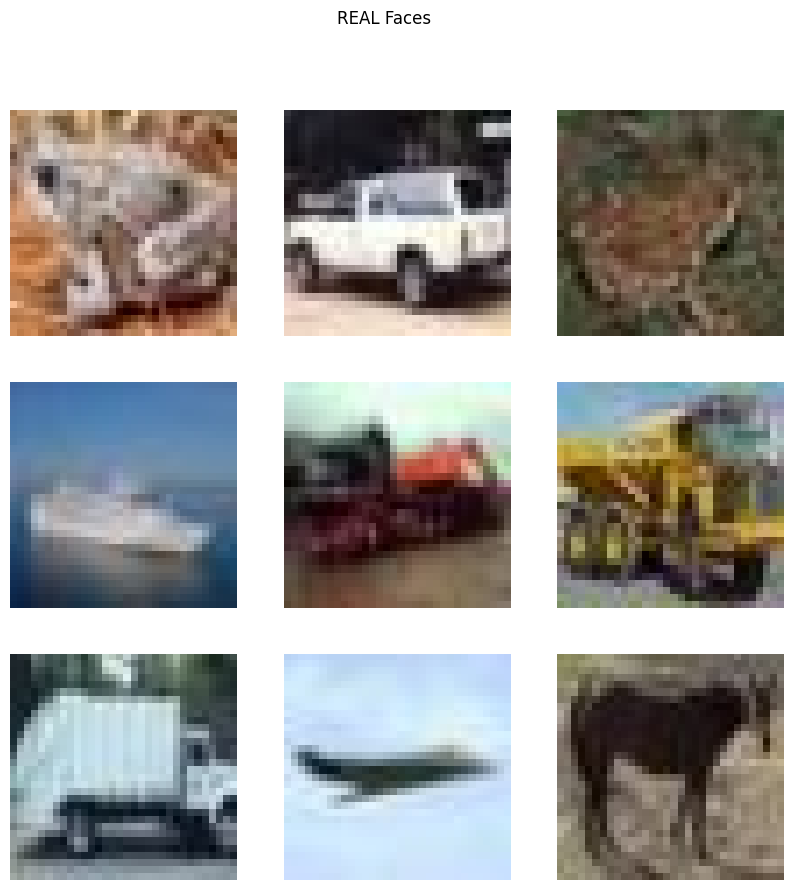

In [10]:
path = '/content/cifake-real-and-ai-generated-synthetic-images'

def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    fig.suptitle(set_ + 'Faces')
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

plot_img(path, 'REAL').show()

In [11]:
bs = 64
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

# validation_set = val_test_datagen.flow_from_directory(path + '/valid',
#                                                       class_mode='binary',
#                                                       shuffle=True,
#                                                       target_size=(row,col),
#                                                       batch_size=bs
                                                    #  )
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'FAKE': 0, 'REAL': 1}

In [12]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (128, 128, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

    #  tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(1, activation='sigmoid')
     ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot


In [14]:
tf.keras.utils.pydot = pydot

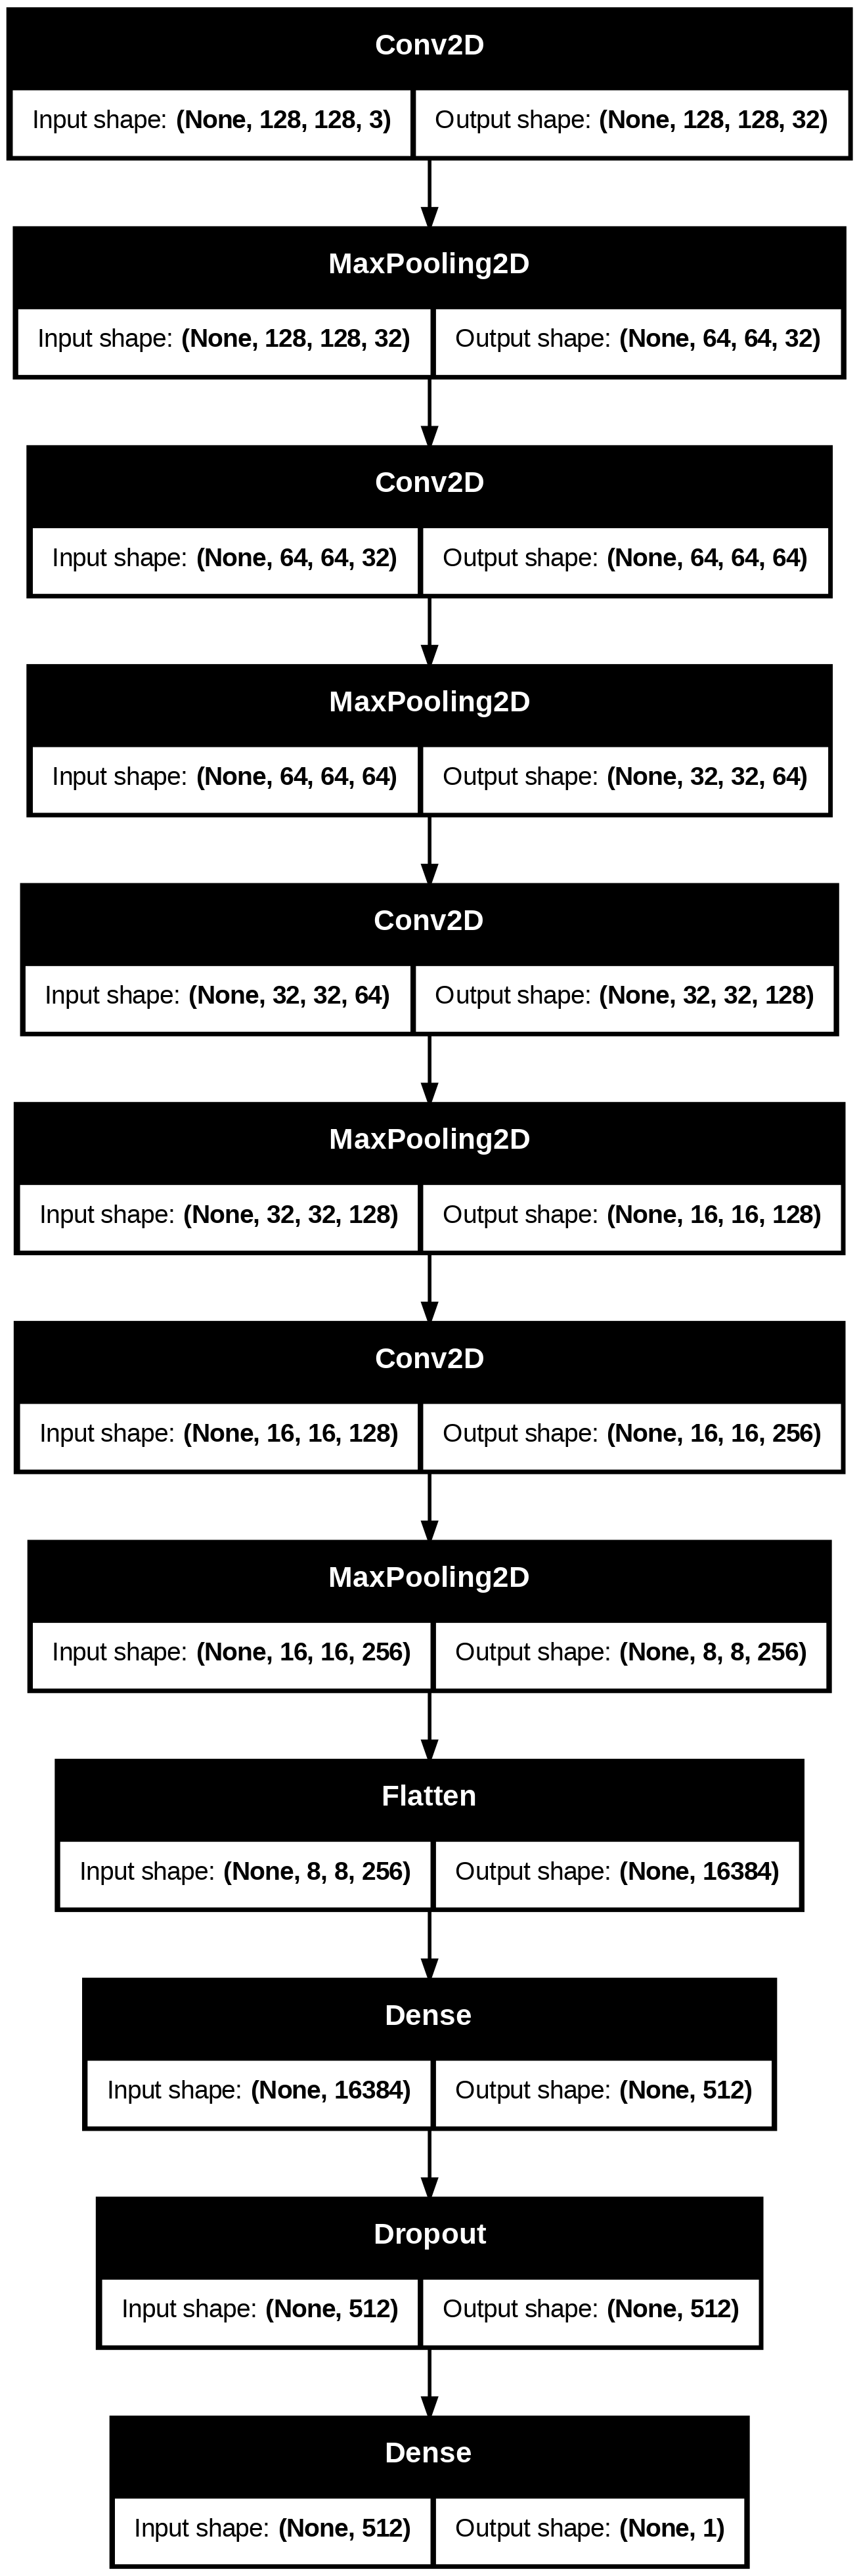

In [15]:
plot_model(model, to_file='model.png', show_shapes=True)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,778,049 (33.49 MB)

 Trainable params: 8,778,049 (33.49 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [18]:
epochs = 10
batch_size = 100
# init_lr = 1e-5
# learning_rate = 1e-3

# optimizer = Adam(lr = init_lr, decay = init_lr/epochs)
# model.compile(loss="binary_crossentropy", optimizer=optimizer)
model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy())

In [19]:
checkpoint = ModelCheckpoint(filepath='/content/Model_weights/MiniNet.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min'
                            #  moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4,
                              verbose=1
                             )
csv_logger = CSVLogger('training.log')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience =5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [20]:
%%time
history = model.fit(training_set, validation_data = test_set, epochs = epochs, validation_steps = 100, verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 57ms/step - accuracy: 0.8452 - loss: 0.3410 - val_accuracy: 0.9311 - val_loss: 0.1682
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.9329 - loss: 0.1746 - val_accuracy: 0.9383 - val_loss: 0.1554
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.9422 - loss: 0.1484 - val_accuracy: 0.9452 - val_loss: 0.1406
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.9494 - loss: 0.1329 - val_accuracy: 0.9489 - val_loss: 0.1397
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.9553 - loss: 0.1161 - val_accuracy: 0.9577 - val_loss: 0.1116
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.9595 - loss: 0.1051 - val_accuracy: 0.9494 - val_loss: 0.1258
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9652 - loss: 0.0933 - val_accuracy: 0.9556 - val_loss: 0.1180
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.9677 - loss:

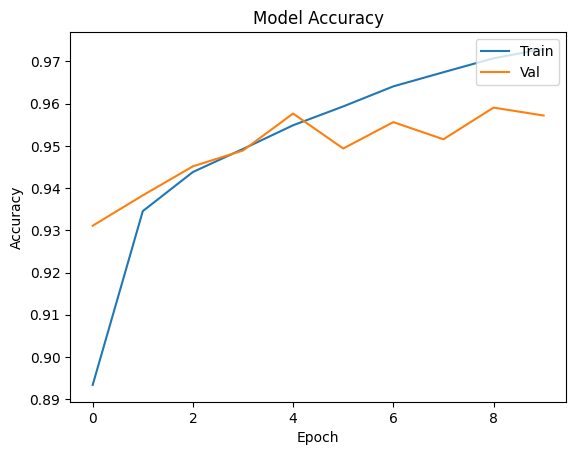

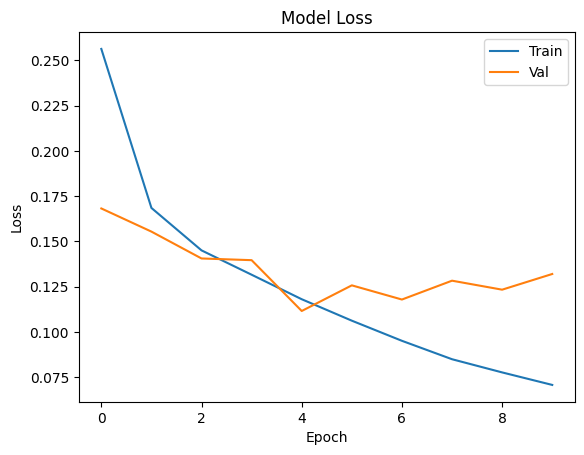

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_set)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9621 - loss: 0.1057


**Model Architecture**